## Use Case 4
### Preprocessing data

In [19]:
import pandas as pd
import json

with open('data/banijay_op1data_twitter_raw.json', 'rb') as f:
    twitter_json = json.load(f)

# convert the json file to a pandas dataframe
df_op1_twitter = pd.json_normalize(twitter_json)

In [20]:
df_op1_twitter['created_at'] = df_op1_twitter['created_at'].apply(lambda x: x[8:10] + '-' + x[5:7] + '-' + x[0:4])

df_op1_twitter.head()

,referenced_tweets,possibly_sensitive,lang,text,edit_history_tweet_ids,author_id,created_at,id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,author.id,author.public_metrics.followers_count,author.public_metrics.following_count,author.public_metrics.tweet_count,author.public_metrics.listed_count,author.name,author.username
0,"[{'type': 'replied_to', 'id': '160025955556878...",False,nl,Lees hier het gesprek terug: #Op1 \n\nhttps://...,[1600440065410453509],17022916,07-12-2022,1600440065410453509,0,8,0,0,17022916,337078,1432,38840,2362,Op1,op1npo
1,"[{'type': 'replied_to', 'id': '160025483213200...",False,nl,Lees hier het gesprek terug: #Op1 \n\nhttps://...,[1600440000520372225],17022916,07-12-2022,1600440000520372225,0,0,0,0,17022916,337078,1432,38840,2362,Op1,op1npo
2,"[{'type': 'replied_to', 'id': '160025268126773...",False,nl,@mariettehamer Lees hier het gesprek terug: #O...,[1600431542878314497],17022916,07-12-2022,1600431542878314497,0,1,0,0,17022916,337078,1432,38840,2362,Op1,op1npo
3,"[{'type': 'replied_to', 'id': '160025066981831...",False,nl,@fleurjongepier Lees hier het gesprek terug: #...,[1600431528479178754],17022916,07-12-2022,1600431528479178754,0,0,2,0,17022916,337078,1432,38840,2362,Op1,op1npo
4,"[{'type': 'replied_to', 'id': '160024856209630...",False,nl,@robdewijk Lees hier het gesprek terug: #Op1 \...,[1600426335301767169],17022916,07-12-2022,1600426335301767169,1,0,1,0,17022916,337078,1432,38840,2362,Op1,op1npo


In [21]:
df_op1_twitter = df_op1_twitter[df_op1_twitter['referenced_tweets'].isna() == True]

df_op1_twitter = df_op1_twitter.drop('referenced_tweets',axis=1)

### Calculating engagement rate

In [22]:
df_op1_twitter = df_op1_twitter.groupby('created_at',as_index=False).mean()

df_op1_twitter.columns = ["date","possibly_sensitive","public_metrics.retweet_count","public_metrics.reply_count","public_metrics.like_count","public_metrics.quote_count","author.public_metrics.followers_count","author.public_metrics.following_count","author.public_metrics.tweet_count","author.public_metrics.listed_count"]

df_op1_twitter['engagement_rate'] = ((df_op1_twitter['public_metrics.reply_count'] + df_op1_twitter['public_metrics.retweet_count'] + df_op1_twitter['public_metrics.like_count'] + df_op1_twitter['public_metrics.quote_count']) / df_op1_twitter['author.public_metrics.followers_count']) * 100

### Merging Data

In [23]:
df_content_ratings = pd.read_csv('data/banijay_op1data_content_ratings.csv',compression = 'zip')
# df_content_ratings['date'].head()

df_content_ratings[df_content_ratings['content_id'] == 'WON02072823_01']

df_content_ratings

,Unnamed: 0,date,hosts,id,length,start,end,title,summary,keywords,...,Target Group,Broadcast Type,Ratings Type,Kdh%,Kdh000,Zadl%,date_time_y,year,date_time_str_y,date_time_string
0,0,01-02-2021,"['Hilbrand, Sophie', 'Logtenberg, Hugo']",OP1__________-WON02197428_01_segment,00:21:21,22:20:11:10,22:41:32:12,"Gerard Smetsers, Annelie Jager en Károly Illy ...","De basisscholen mogen weer open, maar dat bete...","['directeur', 'gesloten', 'basisscholen']",...,tot6plus,live/prerecorded uitzendingen,uitzenddag,4.780207,770.139215,14.891998,2021-02-01 22:20:00,2021-02,2021-02-01 22:20:00,2021-02-01 22:20:00
1,1,01-02-2021,"['Hilbrand, Sophie', 'Logtenberg, Hugo']",OP1__________-WON02197428_01_segment,00:21:21,22:20:11:10,22:41:32:12,"Gerard Smetsers, Annelie Jager en Károly Illy ...","De basisscholen mogen weer open, maar dat bete...","['directeur', 'gesloten', 'basisscholen']",...,tot6plus,live/prerecorded uitzendingen,uitgesteld,0.543840,87.618072,8.321518,2021-02-01 22:20:00,2021-02,2021-02-01 22:20:00,2021-02-01 22:20:00
2,2,01-02-2021,"['Hilbrand, Sophie', 'Logtenberg, Hugo']",OP1__________-WON02197428_01_segment,00:21:21,22:20:11:10,22:41:32:12,"Gerard Smetsers, Annelie Jager en Károly Illy ...","De basisscholen mogen weer open, maar dat bete...","['directeur', 'gesloten', 'basisscholen']",...,tot6plus,live/prerecorded uitzendingen,totaal,4.883685,786.810563,13.787042,2021-02-01 22:20:00,2021-02,2021-02-01 22:20:00,2021-02-01 22:20:00
3,3,01-02-2021,"['Hilbrand, Sophie', 'Logtenberg, Hugo']",OP1__________-WON02197428_01_segment,00:21:21,22:20:11:10,22:41:32:12,"Gerard Smetsers, Annelie Jager en Károly Illy ...","De basisscholen mogen weer open, maar dat bete...","['directeur', 'gesloten', 'basisscholen']",...,boodschapper_20_49,live/prerecorded uitzendingen,uitzenddag,1.429438,51.516930,6.057109,2021-02-01 22:20:00,2021-02,2021-02-01 22:20:00,2021-02-01 22:20:00
4,4,01-02-2021,"['Hilbrand, Sophie', 'Logtenberg, Hugo']",OP1__________-WON02197428_01_segment,00:21:21,22:20:11:10,22:41:32:12,"Gerard Smetsers, Annelie Jager en Károly Illy ...","De basisscholen mogen weer open, maar dat bete...","['directeur', 'gesloten', 'basisscholen']",...,boodschapper_20_49,live/prerecorded uitzendingen,uitgesteld,0.132478,4.774516,1.940924,2021-02-01 22:20:00,2021-02,2021-02-01 22:20:00,2021-02-01 22:20:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1105942,1105942,31-08-2022,"['Groenhuijsen, Charles', 'Napel, Carrie ten']",OP1__________-WON02340053_03_segment,00:13:49,22:52:52:13,23:06:41:12,Tim Knol en Nico Dijkshoorn over hun album en ...,Tim Knol kwam deze maand met alweer zijn vijfd...,"['dokter', 'vanavond', 'soloalbum']",...,m_6plus_jr,live/prerecorded uitzendingen,uitgesteld,0.459929,36.950695,11.514683,2022-08-31 23:06:00,2022-08,2022-08-31 23:06:00,2022-08-31 23:06:00
1105943,1105943,31-08-2022,"['Groenhuijsen, Charles', 'Napel, Carrie ten']",OP1__________-WON02340053_03_segment,00:13:49,22:52:52:13,23:06:41:12,Tim Knol en Nico Dijkshoorn over hun album en ...,Tim Knol kwam deze maand met alweer zijn vijfd...,"['dokter', 'vanavond', 'soloalbum']",...,m_6plus_jr,live/prerecorded uitzendingen,totaal,3.604971,289.623365,20.019168,2022-08-31 23:06:00,2022-08,2022-08-31 23:06:00,2022-08-31 23:06:00
1105944,1105944,31-08-2022,"['Groenhuijsen, Charles', 'Napel, Carrie ten']",OP1__________-WON02340053_03_segment,00:13:49,22:52:52:13,23:06:41:12,Tim Knol en Nico Dijkshoorn over hun album en ...,Tim Knol kwam deze maand met alweer zijn vijfd...,"['dokter', 'vanavond', 'soloalbum']",...,v_6plus_jr,live/prerecorded uitzendingen,uitzenddag,3.671559,299.342246,22.389633,2022-08-31 23:06:00,2022-08,2022-08-31 23:06:00,2022-08-31 23:06:00
1105945,1105945,31-08-2022,"['Groenhuijsen, Charles', 'Napel, Carrie ten']",OP1__________-WON02340053_03_segment,00:13:49,22:52:52:13,23:06:41:12,Tim Knol en Nico Dijkshoorn over hun album en ...,Tim Knol kwam deze maand met alweer zijn vijfd...,"['dokter', 'vanavond', 'solo

In [24]:
df_merged_twitter_ratings = pd.merge(df_content_ratings,df_op1_twitter,on=['date'])

df_merged_twitter_ratings = df_merged_twitter_ratings.drop(['Unnamed: 0'],axis=1)

df_merged_twitter_ratings.info()

df_merged_twitter_ratings['date'].nunique()

df_merged_twitter_ratings.to_csv('data/banijay_op1data_content_ratings_twitter.csv',compression='zip')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1105947 entries, 0 to 1105946
Data columns (total 42 columns):
 #   Column                                 Non-Null Count    Dtype  
---  ------                                 --------------    -----  
 0   date                                   1105947 non-null  object 
 1   hosts                                  1105947 non-null  object 
 2   id                                     1105947 non-null  object 
 3   length                                 1105947 non-null  object 
 4   start                                  1105947 non-null  object 
 5   end                                    1105947 non-null  object 
 6   title                                  1105947 non-null  object 
 7   summary                                1105947 non-null  object 
 8   keywords                               1105947 non-null  object 
 9   date_time_x                            1105947 non-null  object 
 10  date_time_str_x                        110

### Visualizing Data

In [25]:
df_merged_twitter_ratings_top5 = df_merged_twitter_ratings.groupby(['date'],as_index=False).mean()

df_merged_twitter_ratings_top5 = df_merged_twitter_ratings_top5.sort_values(by='engagement_rate',ascending=False)

df_merged_twitter_ratings_top5 = df_merged_twitter_ratings_top5.drop('fragment',axis = 1)

df_merged_twitter_ratings_top5.head()

,date,Kdh%,Kdh000,Zadl%,possibly_sensitive,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,author.public_metrics.followers_count,author.public_metrics.following_count,author.public_metrics.tweet_count,author.public_metrics.listed_count,engagement_rate
295,13-06-2022,2.005591,166.243583,13.220136,0.0,164.583333,92.583333,545.833333,43.083333,337078.0,1432.0,38840.0,2362.0,0.251005
215,10-01-2021,4.777862,358.414557,28.483065,0.0,46.888889,181.888889,220.111111,64.333333,337078.0,1432.0,38840.0,2362.0,0.152256
275,12-08-2020,3.326009,249.277551,24.523520,0.0,108.714286,24.357143,287.571429,33.142857,337078.0,1432.0,38840.0,2362.0,0.134623
21,01-12-2021,2.024089,167.626824,9.888161,0.0,61.947368,44.157895,239.789474,20.842105,337078.0,1432.0,38840.0,2362.0,0.108799
585,25-10-2021,2.173540,173.917041,14.003875,0.0,42.000000,137.888889,145.333333,41.333333,337078.0,1432.0,38840.0,2362.0,0.108745


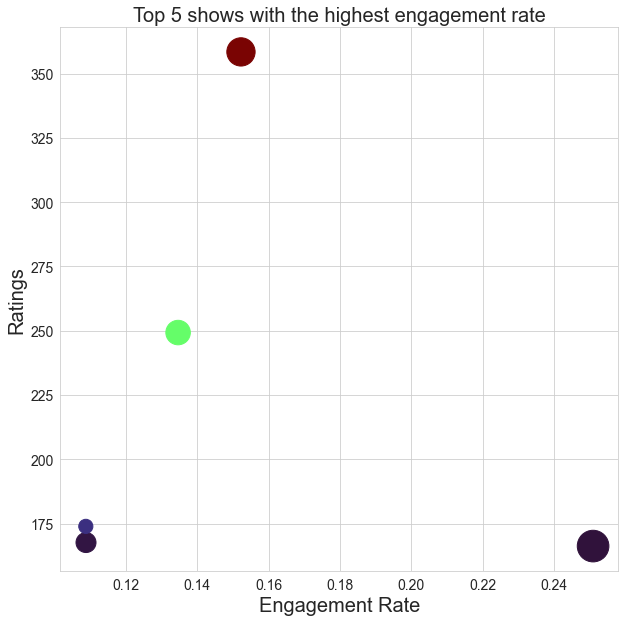

In [29]:
import matplotlib.pyplot as plt
import numpy as np

df_for_plot = df_merged_twitter_ratings_top5[:5]

plt.rcParams['figure.figsize'] = [10, 10]

plt.scatter(df_for_plot['engagement_rate'],df_for_plot['Kdh000'], c=df_for_plot['Kdh000'], cmap='turbo',s = [1000,800,600,400,200])
plt.xlabel('Engagement Rate', fontsize = 20)
plt.ylabel('Ratings',fontsize = 20)
plt.title("Top 5 shows with the highest engagement rate",fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)


plt.show()

As we can see high rating doesn't correspond to a high engagement rate. In the case of this show, the most engagement was caused by the show with a minor rating.

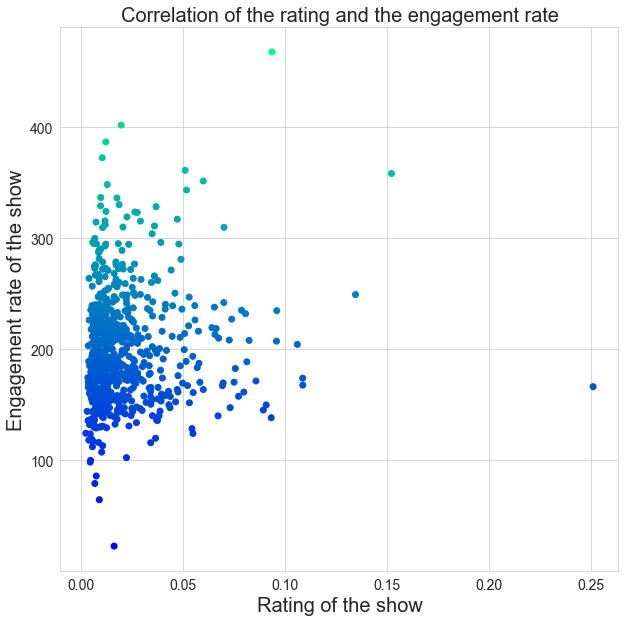

In [30]:
df_for_rating_engagement = df_merged_twitter_ratings_top5.dropna(axis='rows')

plt.rcParams['figure.figsize'] = [10, 10]
plt.scatter(df_for_rating_engagement['engagement_rate'],df_for_rating_engagement['Kdh000'],c = df_for_rating_engagement['Kdh000'], cmap='winter')
plt.title("Correlation of the rating and the engagement rate",fontsize = 20)
plt.xlabel("Rating of the show",fontsize = 20)
plt.ylabel("Engagement rate of the show",fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)


plt.show()

As we can see from this plot, there is no correlation between the ratings of the show and its engagement rate